## SVM
ロジスティック回帰と同じように線形分類を行うアルゴリズム
「カーネル化」という手法を組み合わせたカーネルSVMを使うことで非線形分離問題にも対応できる

・良い点<br>
最適化すべきパラメータが少ない・データの特徴量が高次元になっても対応できる<br>
・悪い点<br>
データにノイズが含まれている場合やオーバーラップしている場合に綺麗に分類されづらい

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_regions(clf, X, y):
    xx1, xx2 = np.meshgrid(np.arange(0, 12, 0.1),
                           np.arange(0, 12, 0.1))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
    
    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

In [79]:
import pandas as pd

## 1. データの読み込み
df = pd.read_csv('data.csv', index_col=0)
df.head(3)

,x0,x1,y
0,2.413141,1.166672,0.0
1,4.983929,2.296247,0.0
2,3.402277,3.142005,0.0


In [80]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

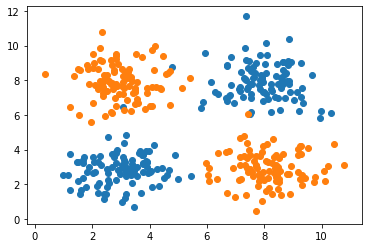

In [81]:
## 2. データのプロット
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])

In [82]:
## 3. 学習　スコア
from sklearn.model_selection import train_test_split

( X_train, X_test,
  y_train, y_test ) = train_test_split(
    X, y, test_size=0.3, random_state=0)

from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

svm.score(X_test, y_test)

0.9916666666666667

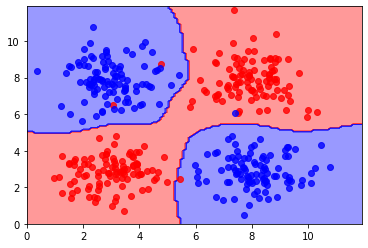

In [83]:
## 4. 学習領域プロット
plot_regions(svm, X, y)

### SVM：ハイパーパラメータ

#####  C      : default 1.0
正則化のパラメータが小さいほど過学習を防ごうとする

##### kernel : default rbf
基本的に使用するのは
線形カーネル 'linear' : 非線型カーネル 'rbf'

##### gamma  : default auto
線に近い方の点か，遠い方の点　どちらを重要視するか決める
値を大きくすると近くの点とのmarginを重要視して線は複雑になる

In [17]:
## C = 1000

from sklearn.svm import SVC
svm = SVC(C=1000, gamma='auto')
svm.fit(X_train, y_train)

svm.score(X_test, y_test)

0.975

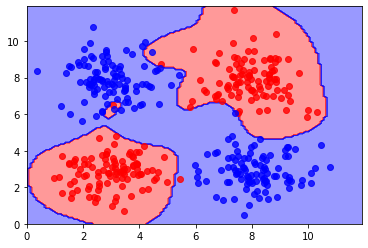

In [19]:
plot_regions(svm, X, y)

In [50]:
## kernel = 'rbf'

from sklearn.svm import SVC
svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train, y_train)

svm.score(X_test, y_test)

0.475

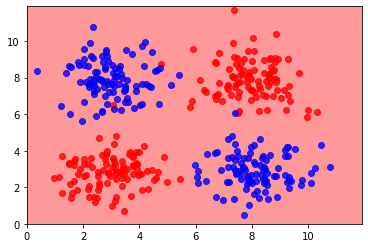

In [51]:
plot_regions(svm, X, y)

In [76]:
## gamma = 2
## ( gamma = 0.5 で 'auto'と同じ状態になった )

from sklearn.svm import SVC
svm = SVC(gamma=2)
svm.fit(X_train, y_train)

svm.score(X_test, y_test)

0.9916666666666667

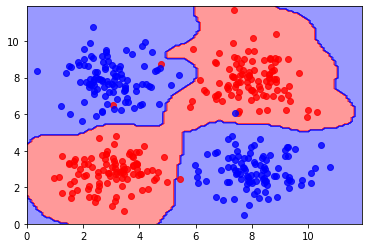

In [77]:
plot_regions(svm, X, y)